In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread, mmwrite
from scipy.stats import pearsonr, spearmanr

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'demuxalot']
atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'scavengers']

overlap_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos']

con_cols = ['C1', 'C2', 'I1', 'I2']

In [5]:
gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t',
                  header=0, index_col=0)
atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t',
                   header=0, index_col=0)
gex.shape, atac.shape

gex.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)
atac.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)
gex.shape, atac.shape

((30497, 9), (30497, 9))

In [6]:
# tmp_gex = gex.copy()
# tmp_atac = atac.copy()
# tmp_gex['inter'] = gex.eq(gex.iloc[:, 0], axis=0).all(1)
# tmp_atac['inter'] = atac.eq(atac.iloc[:, 0], axis=0).all(1)
# tmp_gex['majority'] = gex.mode(axis=1)[0]
# tmp_atac['majority'] = atac.mode(axis=1)[0]

# gex['majority'] = tmp_gex['majority']
# gex['inter'] = tmp_gex['inter']
# atac['majority'] = tmp_atac['majority']
# atac['inter'] = tmp_atac['inter']

In [50]:
cov = 20

tmp_cols = con_cols
condir = f'{projdir}/csv/var_consistency/real/gex/merged/'
all_con_gex = pd.DataFrame(index=gex_methods, columns=tmp_cols, data=0)
for method in gex_methods:
    mask = gex[method] != 'non_singlet'
    method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
    method_gex = gex[mask]
    mask = method_con.index.isin(method_gex.index)
    method_con = method_con[mask]
    tmp_method_con = pd.DataFrame(method_con.sum(axis=0)[:4]).transpose()
    all_con_gex.loc[method] = list(tmp_method_con.iloc[0])
    print(method, method_gex.shape[0])

In [72]:
tmp_cols = con_cols
cov = 0
# cov = 20

# method = 'vireo'
method = 'inter'

condir = f'{projdir}/csv/var_consistency/real/gex/merged/'
mask = gex[method] != 'non_singlet'
gex_method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
method_gex = gex[mask]
mask = gex_method_con.index.isin(method_gex.index)
gex_method_con = gex_method_con[mask]

### use gex 
condir = f'{projdir}/csv/var_consistency/real/atac/merged/'
atac_method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
mask = atac_method_con.index.isin(method_gex.index)
atac_method_con = atac_method_con[mask]

In [73]:
gex_method_con

,C1,C2,I1,I2,donor
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,82,1118,19,3,25_A4
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,48,1046,34,2,25_A4
AAACATGCAAACATAG-1_20220928-IGVF-D0,28,551,22,6,25_A4
AAACATGCAATCGCAC-1_20220928-IGVF-D0,42,831,22,2,25_A4
AAACATGCAGGGAGGA-1_20220928-IGVF-D0,38,731,19,5,25_A4
...,...,...,...,...,...
TTTGCGGAGGACACTT-1_20220928-IGVF-D3,14,359,8,1,48_V3
TTTGTCCCATTGCAGC-1_20220928-IGVF-D3,34,814,32,3,48_V3
TTTGTGAAGGACGTAA-1_20220928-IGVF-D3,7,257,11,3,48_V3
TTTGTGTTCTTCAATC-1_20220928-IGVF-D3,21,441,9,3,48_V3


In [74]:
atac_method_con

,C1,C2,I1,I2,donor
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,73,941,10,2,25_A4
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,97,1423,19,3,25_A4
AAACATGCAAACATAG-1_20220928-IGVF-D0,24,500,2,0,25_A4
AAACATGCAATCGCAC-1_20220928-IGVF-D0,123,1981,19,9,25_A4
AAACATGCAGGGAGGA-1_20220928-IGVF-D0,92,1611,22,3,25_A4
...,...,...,...,...,...
TTTGTGAAGGACGTAA-1_20220928-IGVF-D3,71,1776,44,0,48_V3
TTTGTGTTCAGGAAGC-1_20220928-IGVF-D3,30,1288,24,0,48_V3
TTTGTGTTCATAACGC-1_20220928-IGVF-D3,5,241,20,0,48_V3
TTTGTGTTCTTTAGGA-1_20220928-IGVF-D3,77,2020,34,1,48_V3


In [75]:
tmp_gex_con = gex_method_con[gex_method_con.index.isin(atac_method_con.index)]
tmp_atac_con = atac_method_con[atac_method_con.index.isin(gex_method_con.index)]
tmp_gex_con.sort_index(inplace=True)
tmp_atac_con.sort_index(inplace=True)

mask = tmp_gex_con['donor'] == tmp_atac_con['donor']

tmp_gex_con = tmp_gex_con[mask]
tmp_atac_con = tmp_atac_con[mask]

tmp_gex_con.shape, tmp_atac_con.shape

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


((14658, 5), (14658, 5))

In [76]:
con_corrs = pd.DataFrame(index=con_cols, columns=['pearsonr'])
for col in con_cols:    
    con_corrs.loc[col] = pearsonr(tmp_gex_con[col], tmp_atac_con[col])[0]
con_corrs    

,pearsonr
C1,0.557303
C2,0.531934
I1,0.587645
I2,0.373286


In [77]:
con_corrs = pd.DataFrame(index=con_cols, columns=['spearmanr'])
for col in con_cols:    
    con_corrs.loc[col] = spearmanr(tmp_gex_con[col], tmp_atac_con[col])[0]
con_corrs

,spearmanr
C1,0.525168
C2,0.353866
I1,0.124451
I2,0.279859


In [78]:
tmp_gex_con

,C1,C2,I1,I2,donor
AAACAGCCAAAGGCCA-1_20220928-IGVF-D3,115,1055,31,8,27_C4
AAACAGCCAACATAAG-1_20220928-IGVF-D3,29,568,11,1,25_A4
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,82,1118,19,3,25_A4
AAACAGCCAATTAGGA-1_20220928-IGVF-D3,19,492,15,0,48_V3
AAACAGCCAGCACGAA-1_20220928-IGVF-D3,58,822,12,4,25_A4
...,...,...,...,...,...
TTTGTTGGTGTTGTAG-1_20220928-IGVF-D3,25,392,18,2,25_A4
TTTGTTGGTTAGTACG-1_20220928-IGVF-D0,26,761,26,4,48_V3
TTTGTTGGTTGCCTCA-1_20220928-IGVF-D3,33,410,10,2,25_A4
TTTGTTGGTTGGATAT-1_20220928-IGVF-D3,40,557,13,1,25_A4


In [79]:
tmp_atac_con

,C1,C2,I1,I2,donor
AAACAGCCAAAGGCCA-1_20220928-IGVF-D3,501,4041,51,12,27_C4
AAACAGCCAACATAAG-1_20220928-IGVF-D3,112,2131,30,4,25_A4
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,73,941,10,2,25_A4
AAACAGCCAATTAGGA-1_20220928-IGVF-D3,134,3210,43,3,48_V3
AAACAGCCAGCACGAA-1_20220928-IGVF-D3,27,473,8,2,25_A4
...,...,...,...,...,...
TTTGTTGGTGTTGTAG-1_20220928-IGVF-D3,190,3069,111,2,25_A4
TTTGTTGGTTAGTACG-1_20220928-IGVF-D0,63,1192,12,2,48_V3
TTTGTTGGTTGCCTCA-1_20220928-IGVF-D3,35,698,19,2,25_A4
TTTGTTGGTTGGATAT-1_20220928-IGVF-D3,91,1536,32,3,25_A4


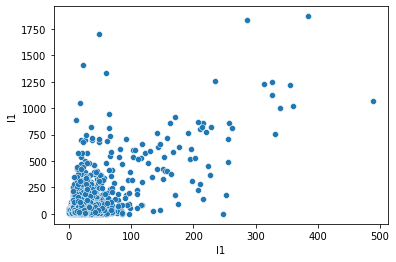

In [80]:
ax = sns.scatterplot(x=tmp_gex_con['I1'], y=tmp_atac_con['I1'])
# ax.set_xlim((0, 1000))

In [71]:
merged_con = pd.concat([tmp_gex_con['I1'], tmp_atac_con['I1']], axis=1)
merged_con.columns = ['RNA', 'ATAC']
merged_con.to_csv(f'{projdir}/csv/final_figures/figure6/figure_6c_rna_atac_i1_corr.csv',
                  sep='\t', header=True, index=True)

In [81]:
# merged_con = pd.concat([tmp_gex_con['C1'], tmp_atac_con['C1']], axis=1)

In [82]:
merged_con.shape

(14658, 2)

### what about just trying to understand I1 rates between modalities?

In [7]:
cov = 0

tmp_cols = con_cols
gex_dir = f'{projdir}/csv/var_consistency/real/gex/merged/'
all_con_gex = pd.DataFrame(index=gex_methods, columns=tmp_cols, data=0)
for method in gex_methods:
    mask = gex[method] != 'non_singlet'
    gex_con = pd.read_csv(f'{gex_dir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
    
    method_gex = gex[mask]
    mask = gex_con.index.isin(method_gex.index)
    gex_con = gex_con[mask]
    tmp_gex_con = pd.DataFrame(gex_con.sum(axis=0)[:4]).transpose()
    all_con_gex.loc[method] = list(tmp_gex_con.iloc[0])
    print(method, method_gex.shape[0])

demuxlet 21408
freemuxlet 28172
vireo 22168
vireo_nogenos 23349
scsplit 23702
scsplit_nogenos 24056
souporcell 24138
souporcell_nogenos 24933
demuxalot 19984


In [12]:
cov = 0
method = 'vireo'

gex_dir = f'{projdir}/csv/var_consistency/real/gex/merged/'
gex_con = pd.read_csv(f'{gex_dir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)

atac_dir = f'{projdir}/csv/var_consistency/real/atac/merged/'
atac_con = pd.read_csv(f'{atac_dir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)

In [16]:
gex_demux = gex[gex[method] != 'non_singlet'][method]
mask = atac_con.index.isin(gex_demux.index)
gex_demux_atac_con = atac_con[mask]

In [25]:
atac_demux = atac[atac[method] != 'non_singlet'][method]
mask = gex_con.index.isin(atac_demux.index)
atac_demux_gex_con = gex_con[mask]
gex_demux_atac_con = gex_demux_atac_con[~gex_demux_atac_con.index.duplicated()]
atac_demux_gex_con = atac_demux_gex_con[~atac_demux_gex_con.index.duplicated()]

In [26]:
gex_demux_atac_con.shape, atac_demux_gex_con.shape

((20748, 5), (20748, 5))

In [29]:
gex_demux_atac_con['mod'] = 'RNA'
atac_demux_gex_con['mod'] = 'ATAC'

In [67]:
gex_con.head()

,C1,C2,I1,I2,donor
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,82,1118,19,3,25_A4
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,48,1046,34,2,25_A4
AAACATGCAAACATAG-1_20220928-IGVF-D0,28,551,22,6,25_A4
AAACATGCAATCGCAC-1_20220928-IGVF-D0,42,831,22,2,25_A4
AAACATGCAGGGAGGA-1_20220928-IGVF-D0,38,731,19,5,25_A4


In [68]:
atac_con.head()

,C1,C2,I1,I2,donor
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,73,941,10,2,25_A4
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,97,1423,19,3,25_A4
AAACATGCAAACATAG-1_20220928-IGVF-D0,24,500,2,0,25_A4
AAACATGCAATCGCAC-1_20220928-IGVF-D0,123,1981,19,9,25_A4
AAACATGCAGGGAGGA-1_20220928-IGVF-D0,92,1611,22,3,25_A4


In [54]:
true_gex_con = gex_con[gex_con.index.isin(gex_demux_atac_con.index)]
true_atac_con = atac_con[atac_con.index.isin(atac_demux_gex_con.index)]
true_gex_con = true_gex_con[~true_gex_con.index.duplicated()]
true_atac_con = true_atac_con[~true_atac_con.index.duplicated()]
true_gex_con.shape, true_atac_con.shape

((20748, 5), (20748, 5))

<AxesSubplot:xlabel='C2', ylabel='C2'>

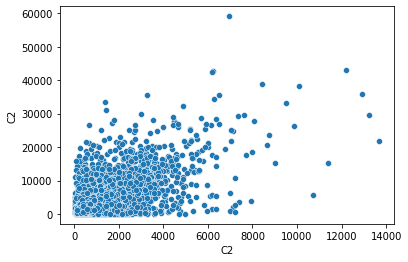

In [56]:
sns.scatterplot(x=true_gex_con['C2'], y=gex_demux_atac_con['C2'])

<AxesSubplot:xlabel='I1', ylabel='I1'>

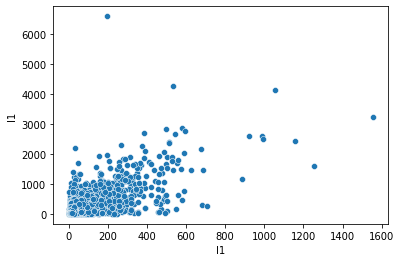

In [58]:
sns.scatterplot(x=true_gex_con['I1'], y=gex_demux_atac_con['I1'])

In [77]:
# sns.scatterplot(x=true_atac_con['C2'], y=atac_demux_gex_con['C2'])

In [83]:
true_atac_con['C2'].head(), atac_demux_gex_con['C2'].head()

(AAACAGCCAATGCGCT-1_20220928-IGVF-D0     941
 AAACAGCCATTGTGAT-1_20220928-IGVF-D0    1423
 AAACATGCAAACATAG-1_20220928-IGVF-D0     500
 AAACATGCAATCGCAC-1_20220928-IGVF-D0    1981
 AAACATGCAGGGAGGA-1_20220928-IGVF-D0    1611
 Name: C2, dtype: int64,
 AAACAGCCAATGCGCT-1_20220928-IGVF-D0    1118
 AAACAGCCATTGTGAT-1_20220928-IGVF-D0    1046
 AAACATGCAAACATAG-1_20220928-IGVF-D0     551
 AAACATGCAATCGCAC-1_20220928-IGVF-D0     831
 AAACATGCAGGGAGGA-1_20220928-IGVF-D0     731
 Name: C2, dtype: int64)

In [84]:
true_gex_con['C2'].head(), gex_demux_atac_con['C2'].head()

(AAACAGCCAATGCGCT-1_20220928-IGVF-D0    1118
 AAACAGCCATTGTGAT-1_20220928-IGVF-D0    1046
 AAACATGCAAACATAG-1_20220928-IGVF-D0     551
 AAACATGCAATCGCAC-1_20220928-IGVF-D0     831
 AAACATGCAGGGAGGA-1_20220928-IGVF-D0     731
 Name: C2, dtype: int64,
 AAACAGCCAATGCGCT-1_20220928-IGVF-D0     941
 AAACAGCCATTGTGAT-1_20220928-IGVF-D0    1423
 AAACATGCAAACATAG-1_20220928-IGVF-D0     500
 AAACATGCAATCGCAC-1_20220928-IGVF-D0    1981
 AAACATGCAGGGAGGA-1_20220928-IGVF-D0    1611
 Name: C2, dtype: int64)

In [78]:
# sns.scatterplot(x=true_atac_con['I1'], y=atac_demux_gex_con['I1'])

In [88]:
pearsonr(true_gex_con['C1'], gex_demux_atac_con['C1'])[1], \
pearsonr(true_gex_con['C2'], gex_demux_atac_con['C2'])[1], \
pearsonr(true_gex_con['I1'], gex_demux_atac_con['I1'])[1], \
pearsonr(true_gex_con['I2'], gex_demux_atac_con['I2'])[1]

(3.459705851436051e-103,
 0.8119791774224151,
 0.43628390223028307,
 2.5948785955426734e-12)

In [73]:
spearmanr(true_gex_con['C2'], gex_demux_atac_con['C2'])[1], \
spearmanr(true_gex_con['I1'], gex_demux_atac_con['I1'])[1]

(0.876654496635352,
 4.5121714119506135e-52,
 0.876654496635352,
 4.512171411950421e-52)

In [55]:
multi_con = pd.concat([gex_demux_atac_con, atac_demux_gex_con])
multi_con.drop(columns=['donor'], inplace=True)
multi_con.head()

,C1,C2,I1,I2,mod
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,73,941,10,2,RNA
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,97,1423,19,3,RNA
AAACATGCAAACATAG-1_20220928-IGVF-D0,24,500,2,0,RNA
AAACATGCAATCGCAC-1_20220928-IGVF-D0,123,1981,19,9,RNA
AAACATGCAGGGAGGA-1_20220928-IGVF-D0,92,1611,22,3,RNA


In [43]:
gex_demux_atac_con['C2']

AAACAGCCAATGCGCT-1_20220928-IGVF-D0     941
AAACAGCCATTGTGAT-1_20220928-IGVF-D0    1423
AAACATGCAAACATAG-1_20220928-IGVF-D0     500
AAACATGCAATCGCAC-1_20220928-IGVF-D0    1981
AAACATGCAGGGAGGA-1_20220928-IGVF-D0    1611
                                       ... 
TTTGTCCCATTGCAGC-1_20220928-IGVF-D3    1995
TTTGTGAAGACAACGA-1_20220928-IGVF-D3    1866
TTTGTGAAGGACGTAA-1_20220928-IGVF-D3    1776
TTTGTGTTCAGGAAGC-1_20220928-IGVF-D3    1288
TTTGTGTTCTTTAGGA-1_20220928-IGVF-D3    2020
Name: C2, Length: 20748, dtype: int64

In [39]:
# multi_con.melt(id_vars=['mod'])
tmp = multi_con.melt(id_vars=['mod'])

In [40]:
tmp['variable'] = 

,mod,variable,value
0,RNA,C1,73
1,RNA,C1,97
2,RNA,C1,24
3,RNA,C1,123
4,RNA,C1,92
...,...,...,...
165979,ATAC,I2,3
165980,ATAC,I2,1
165981,ATAC,I2,3
165982,ATAC,I2,0
